In [5]:
!pip install matplotlib
%pip install ipympl     # one-time install
import ipympl
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 379.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 328.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 277.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
import tdiff.checklist as cl

section_order = [
    # preprocessing
    "pre_preprocessing",
    "preprocessing_post_resize",
    "preprocessing_post_pad",
    "preprocessing_post_rescale",
    "preprocessing_pre_norm",
    "preprocessing_post_norm",
    # embedding
    "pre_convolve",
    "post_convolve",
    "post_tile_pos_embed",
    "post_cls_token",
    "post_gated_pos_embed",
    "post_layernorm",
    # local encoder
    "pre_local_encoder",
    "pre_local_layers",
    "post_local_layers",
    "post_local_encoder",
    "post_after_local_layernorm",
    "post_tile_embed",
    # global encoder
    "pre_global_encoder",
    "post_global_encoder",
    "vision_processing_output",
]

cl.print_checklist(section_order=section_order)

Tensor Name                               Status  Reason(s)
------------------------------------------------------------
pre_preprocessing.img                     N/A     only one project
preprocessing_post_resize.img             ✅     —
preprocessing_post_pad.img                ✅     —
preprocessing_post_rescale.img            ✅     —
preprocessing_pre_norm.img                ✅     —
preprocessing_pre_norm.mean               ✅     —
preprocessing_pre_norm.std                ✅     —
preprocessing_post_norm.img               ✅     —
pre_convolve.patch_embedding_weight       ✅     —
pre_convolve.pixel_values                 ✅     —
pre_convolve.prematmul_tiles              ✅     —
post_convolve.hidden_state                ❌     numeric@[1, 359, 907]
post_tile_pos_embed.hidden_state          ❌     numeric@[0, 1, 359, 907]
post_cls_token.hidden_state               ❌     numeric@[1, 360, 907]
post_gated_pos_embed.hidden_state         ❌     numeric@[0, 1, 360, 907]
post_layernorm.hidden_stat

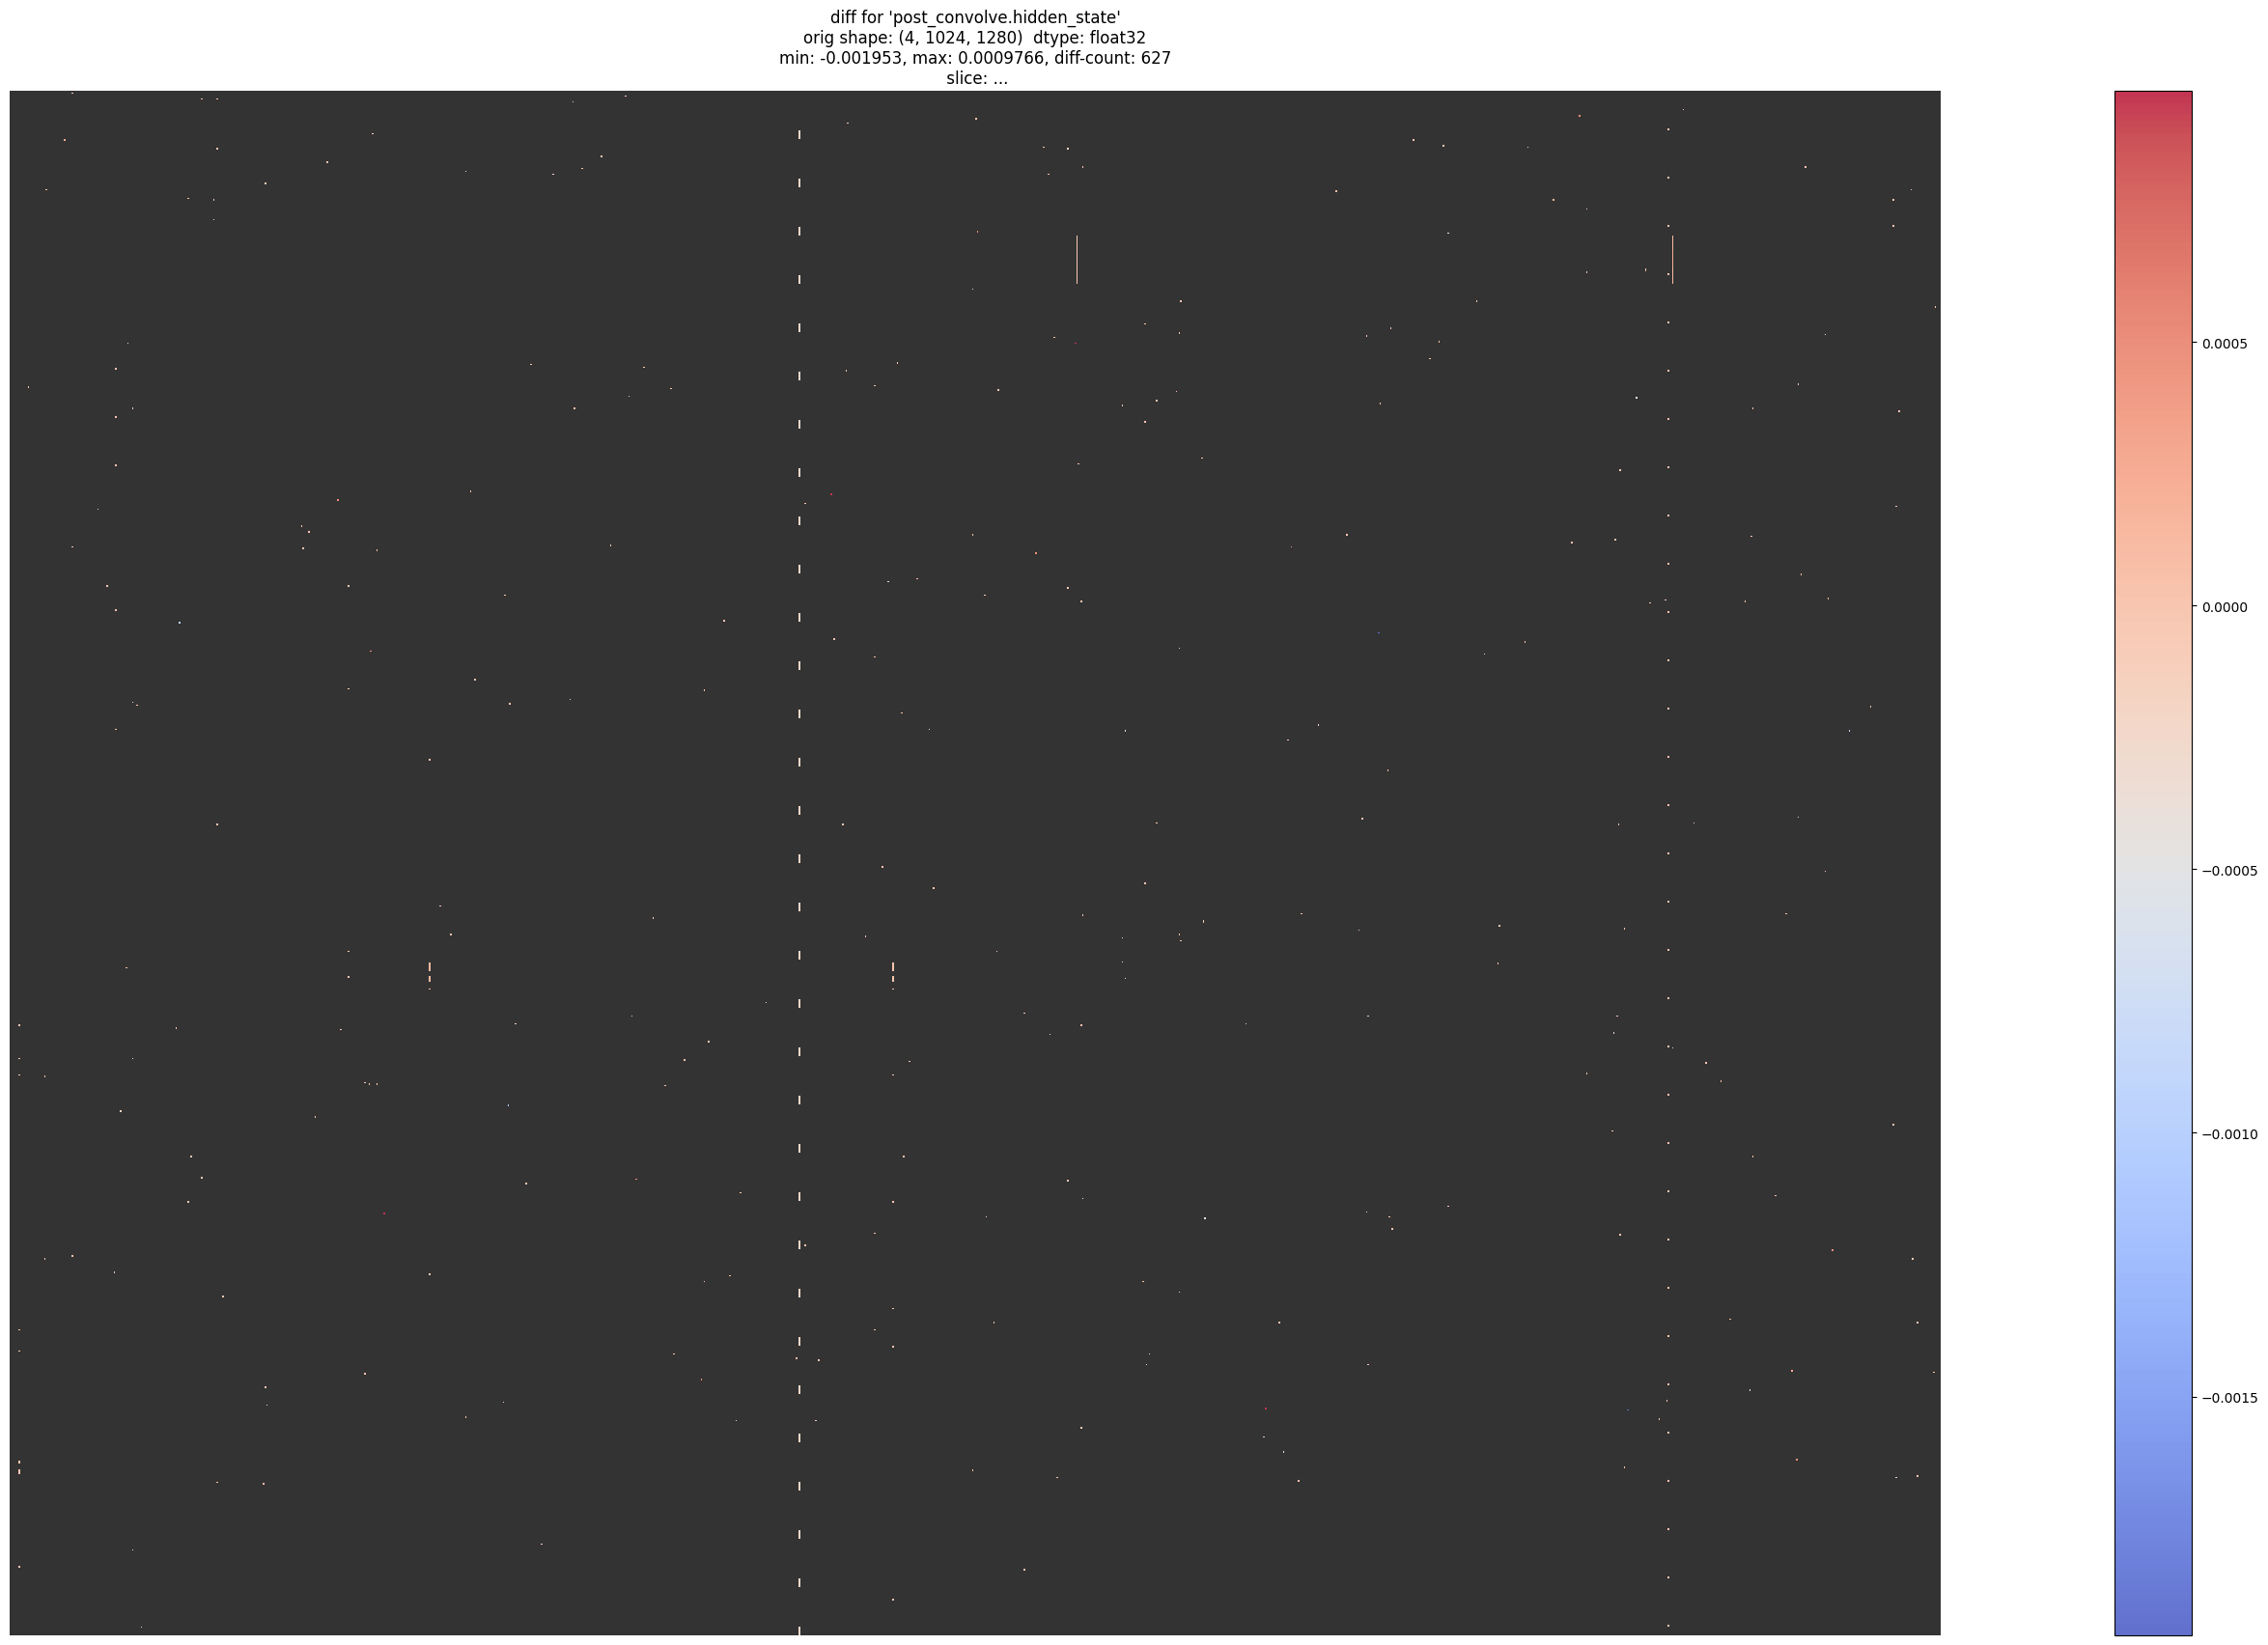

In [43]:
import tdiff.compare as cmp

# modes = diff, abs, sign, # ratio
cmp.show("post_convolve.hidden_state", index="...", mode="diff", projects=["vllm", "jax"], zero_black=True, canvas_size=(18*2,8*2))

In [40]:
import tdiff.compare as cmp
import numpy as np

tensor = "pre_local_encoder.hidden_state"

x1 = cmp.load(tensor, projects=["vllm"])
x2 = cmp.load(tensor, projects=["jax"])

print(np.min(x1), np.max(x1)) 
print(np.min(x2), np.max(x2))
print(np.sum(x1 - x2))

-33.5 63.25
-33.5 63.25
-0.15619804
